# Get daily average weather station data (Global)

A set of Python tools to make it easier to extract weather station data (e.g., temperature, precipitation) from the [Global Historical Climatology Network - Daily (GHCND)](https://www.ncdc.noaa.gov/ghcn-daily-description)

More information on the data can be found [here](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt)

In [1]:
from get_station_data import ghcnd
from get_station_data.util import nearest_stn

%matplotlib inline 

### Read station metadata

In [2]:
stn_md = ghcnd.get_stn_metadata()

### Choose a location (lon/lat) and number of nearest neighbours

In [3]:
london_lon_lat = -0.1278, 51.5074
my_stns = nearest_stn(stn_md, 
                        london_lon_lat[0], london_lon_lat[1], 
                        n_neighbours=5 )
my_stns

,station,lat,lon,elev,name,start_year,end_year
52553,UKE00105915,51.5608,0.1789,137.0,HAMPSTEAD,1959.0,2016.0
52605,UKM00003772,51.4780,-0.4610,25.3,HEATHROW,1973.0,2023.0
52538,UKE00105900,51.8067,0.3581,128.0,ROTHAMSTED,1916.0,2023.0
52631,UKW00035054,51.2833,0.4000,91.1,WEST MALLING,1960.0,1964.0
52571,UKE00107650,51.4789,0.4489,25.0,HEATHROW,1959.0,2023.0


### Download and extract data into a pandas DataFrame

In [4]:
df = ghcnd.get_data(my_stns)

df.head()

,station,element,value,mflag,qflag,sflag,date,lon,lat,elev,name
91938,UKE00107650,TMIN,15.0,,,E,2023-06-29,0.4489,51.4789,25.0,HEATHROW
91939,UKE00107650,PRCP,0.6,,,E,2023-06-30,0.4489,51.4789,25.0,HEATHROW
91940,UKE00107650,SNWD,0.0,,,E,2023-06-30,0.4489,51.4789,25.0,HEATHROW
91941,UKE00107650,TMAX,NaN,,,,2023-06-30,0.4489,51.4789,25.0,HEATHROW
91942,UKE00107650,TMIN,11.8,,,E,2023-06-30,0.4489,51.4789,25.0,HEATHROW


### Filter data for, e.g., a single variable

In [5]:
var = 'PRCP'   # precipitation
df = df[ df['element'] == var ]

### Tidy up columns
df = df.rename(index=str, columns={"value": var})
df = df.drop(['element'], axis=1)

df.head()

,station,year,month,day,PRCP,mflag,qflag,sflag,date,lon,lat,elev,name
93,UKE00105915,1960,1,1,2.5,,,E,1960-01-01,0.1789,51.5608,137.0,HAMPSTEAD
94,UKE00105915,1960,1,2,1.5,,,E,1960-01-02,0.1789,51.5608,137.0,HAMPSTEAD
95,UKE00105915,1960,1,3,1.0,,,E,1960-01-03,0.1789,51.5608,137.0,HAMPSTEAD
96,UKE00105915,1960,1,4,0.8,,,E,1960-01-04,0.1789,51.5608,137.0,HAMPSTEAD
97,UKE00105915,1960,1,5,0.0,,,E,1960-01-05,0.1789,51.5608,137.0,HAMPSTEAD


In [6]:
df.drop(columns=['mflag','qflag','sflag']).tail(n=10)

,station,year,month,day,PRCP,date,lon,lat,elev,name
83938,UKE00107650,2016,12,22,0.0,2016-12-22,0.4489,51.4789,25.0,HEATHROW
83939,UKE00107650,2016,12,23,1.4,2016-12-23,0.4489,51.4789,25.0,HEATHROW
83940,UKE00107650,2016,12,24,0.0,2016-12-24,0.4489,51.4789,25.0,HEATHROW
83941,UKE00107650,2016,12,25,1.0,2016-12-25,0.4489,51.4789,25.0,HEATHROW
83942,UKE00107650,2016,12,26,0.0,2016-12-26,0.4489,51.4789,25.0,HEATHROW
83943,UKE00107650,2016,12,27,0.0,2016-12-27,0.4489,51.4789,25.0,HEATHROW
83944,UKE00107650,2016,12,28,0.2,2016-12-28,0.4489,51.4789,25.0,HEATHROW
83945,UKE00107650,2016,12,29,0.4,2016-12-29,0.4489,51.4789,25.0,HEATHROW
83946,UKE00107650,2016,12,30,0.0,2016-12-30,0.4489,51.4789,25.0,HEATHROW
83947,UKE00107650,2016,12,31,0.4,2016-12-31,0.4489,51.4789,25.0,HEATHROW


### Save to file

In [7]:
df.to_csv('London_5stns_GHCN-D.csv', index=False)

### Plot histogram of all data

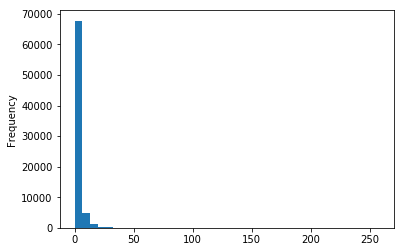

In [8]:
df['PRCP'].plot.hist(bins=40)

### Plot time series for one station

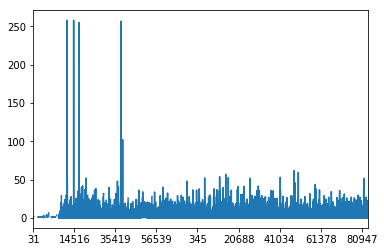

In [9]:
heathrow = df[ df['name'] == 'HEATHROW' ]
heathrow['PRCP'].plot()